# NAME: JAYASREE S

# GRIP @ THE SPARKS FOUNDATION

# Data Science and Business Analytics Intern

# TASK-2: PREDICTION USING UNSUPERVISED ML
                                LEVEL-BEGINNER

In [1]:
#Importing the required linraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Reading the iris dataset

In [3]:
data = pd.read_csv("C:/Users/HP/OneDrive/Desktop/Intershala/GRIP @ TSF/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring the dataset

In [6]:
data.shape

(150, 6)

In [7]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
#Now we can drop the label column(Species) because it is an Unsupervised learning

iris = pd.DataFrame(data)
iris_data = iris.drop(columns = ['Species', 'Id'])
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Finding the Optimum number of clusters

In [13]:
#Calculating the within cluster sum of square
within_cluster_sum_of_square = []
cluster_range = range(1,15)
for k in cluster_range:
    km = KMeans(n_clusters = k)
    km = km.fit(iris_data)
    within_cluster_sum_of_square.append(km.inertia_)

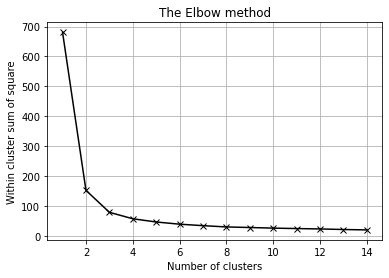

In [33]:
#Plotting the within cluster sum of square

plt.plot(cluster_range, within_cluster_sum_of_square, 'bx-', color="black")
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of square")
plt.grid()
plt.show()

# Elbow Method
Elbow is one of the most famous methods by which you can select the right value of k and boost your model performance. We also perform the hyperparameter tuning to chose the best value of k.

It is an empirical method to find out the best value of k. It picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance.

# 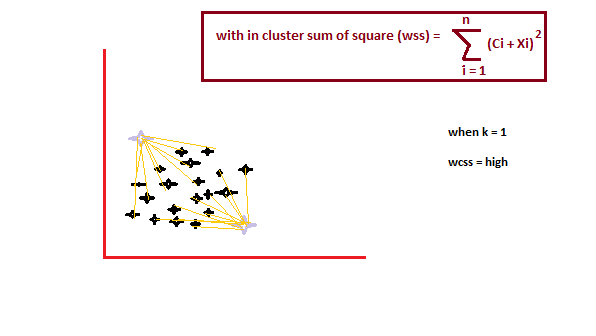 

# K - Means clustering on the data

In [22]:
model = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 0)
predict = model.fit_predict(iris_data)

# Visualising the clusters 

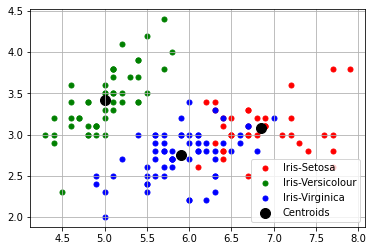

In [30]:
X = iris_data.iloc[:, [0,1,2,3]].values
plt.scatter(X[predict == 0, 0], X[predict == 0, 1], s=25, c='red', label="Iris-Setosa" )
plt.scatter(X[predict == 1, 0], X[predict == 1, 1], s=25, c='green', label="Iris-Versicolour" )
plt.scatter(X[predict == 2, 0], X[predict == 2, 1], s=25, c='blue', label="Iris-Virginica" )
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

